In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('Desktop/baseball.csv') # Importing the data set

In [3]:
data.head() # Probing the data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.columns # Checking the coulmn names

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
data.rename(columns={'W':'Wins', 'R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strike Outs','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs','ERA':'Earned Runs Average','CG':'Complete Games','SHO':'Shutouts','SV':'Saves','E':'Errors',}, inplace=True)
# Now I have replaced the coulmn names to be more unnderstandable by a human

In [6]:
data.head() # Checking if the replacements worked correctly

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
data.describe()  # Checking some basic statistical insight about the data

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All the variables are continuous numerical variables, and we need to classify the data for wins.
Looking at the data set we have "Earned Runs" and "Earned runs average" which denote the same thing but in two different ways. 

In [8]:
data.shape # We have 30 rows and 17 columns

(30, 17)

In [9]:
data.isnull().sum() # Checking if there is any missing data

Wins                   0
Runs                   0
At Bats                0
Hits                   0
Doubles                0
Triples                0
Homeruns               0
Walks                  0
Strike Outs            0
Stolen Bases           0
Runs Allowed           0
Earned Runs            0
Earned Runs Average    0
Complete Games         0
Shutouts               0
Saves                  0
Errors                 0
dtype: int64

We have no null values

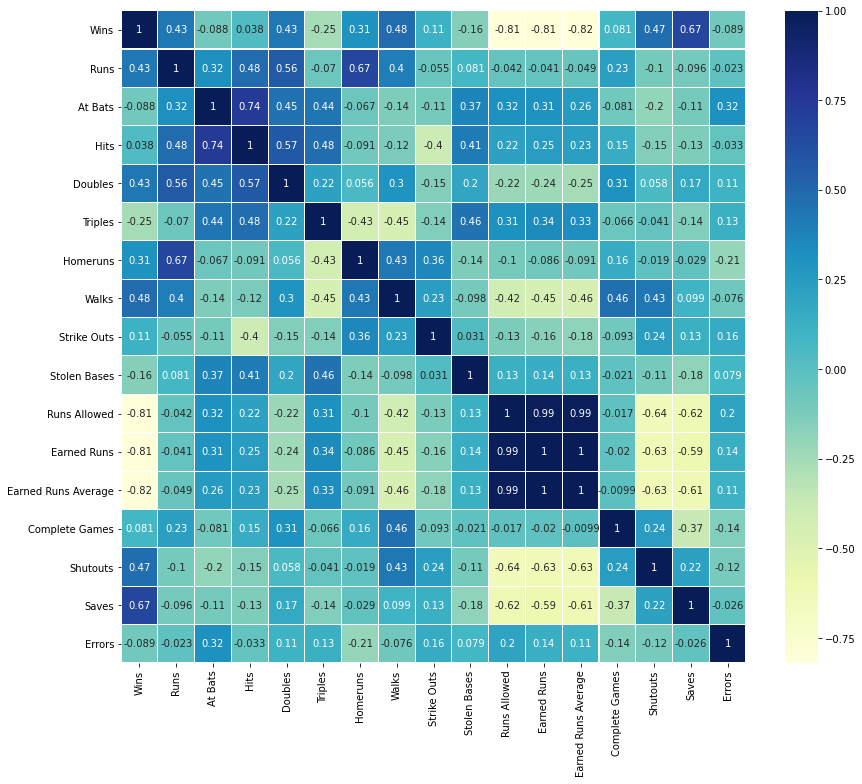

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

As expected the Runs allowed, Earned Runs and Earned runs average are basicaly the same variable albeit in slightly different context. So we can drop two of them. I have chosen to keep Earned Runs as it is the most diverse field. althought chosing another field will yield the same results.

In [11]:
data = data.drop(['Runs Allowed', 'Earned Runs Average'], axis = 1)

As mentioned aboves, we have 3 colums which are highly co-related to each other and we have to remove two of them to prevent inaccuracies.

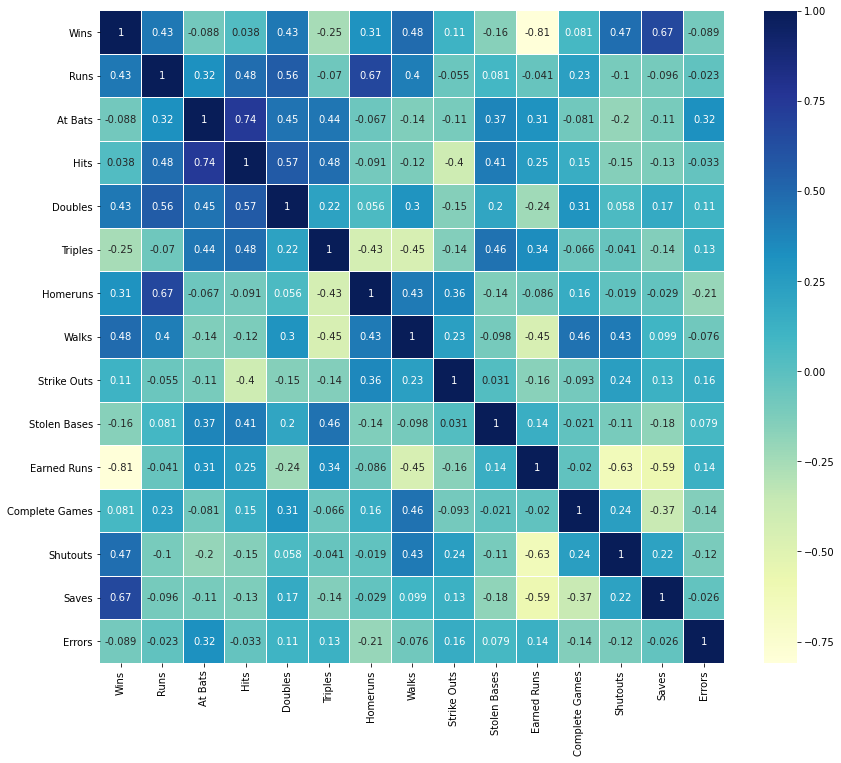

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

We can see which variable are correlated to wins, which are: (Positive and negative corelation). I have taken variables which have a corelation modulus of 0.4 or higher.

Runs

Doubles

Homeruns

Walks

Earned Runs

Shutouts 

Saves

<Figure size 864x288 with 0 Axes>

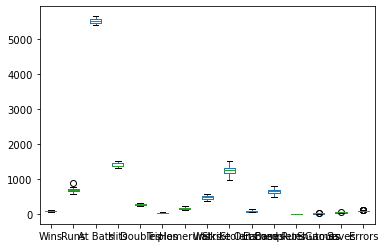

In [13]:
plt.figure(figsize=(12,4))
data.plot(kind='box')
plt.show()

These are the box plots of all the variables at hand.

Performing bi-variate analysis

<Figure size 432x288 with 0 Axes>

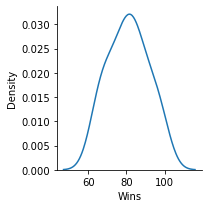

<Figure size 432x288 with 0 Axes>

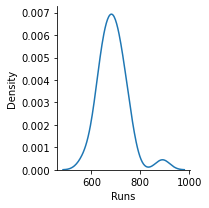

<Figure size 432x288 with 0 Axes>

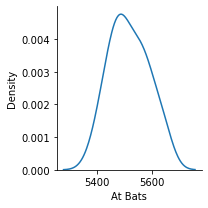

<Figure size 432x288 with 0 Axes>

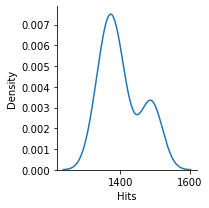

<Figure size 432x288 with 0 Axes>

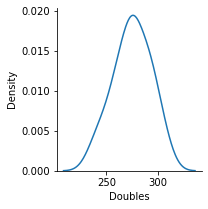

<Figure size 432x288 with 0 Axes>

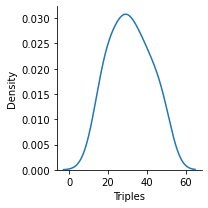

<Figure size 432x288 with 0 Axes>

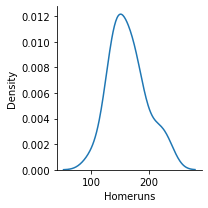

<Figure size 432x288 with 0 Axes>

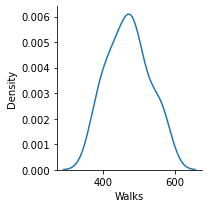

<Figure size 432x288 with 0 Axes>

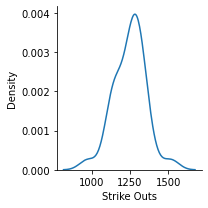

<Figure size 432x288 with 0 Axes>

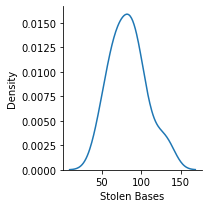

<Figure size 432x288 with 0 Axes>

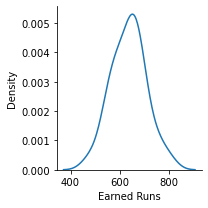

<Figure size 432x288 with 0 Axes>

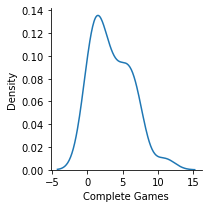

<Figure size 432x288 with 0 Axes>

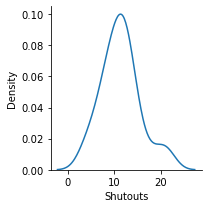

<Figure size 432x288 with 0 Axes>

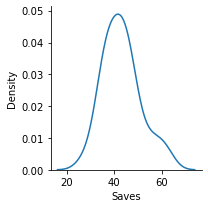

<Figure size 432x288 with 0 Axes>

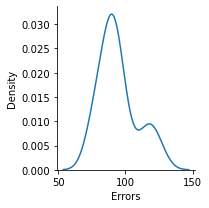

In [14]:
for col in data.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(data[col],kind='kde',height=3)
    plt.show()

Performing Multi Variate analysis below

<Figure size 288x288 with 0 Axes>

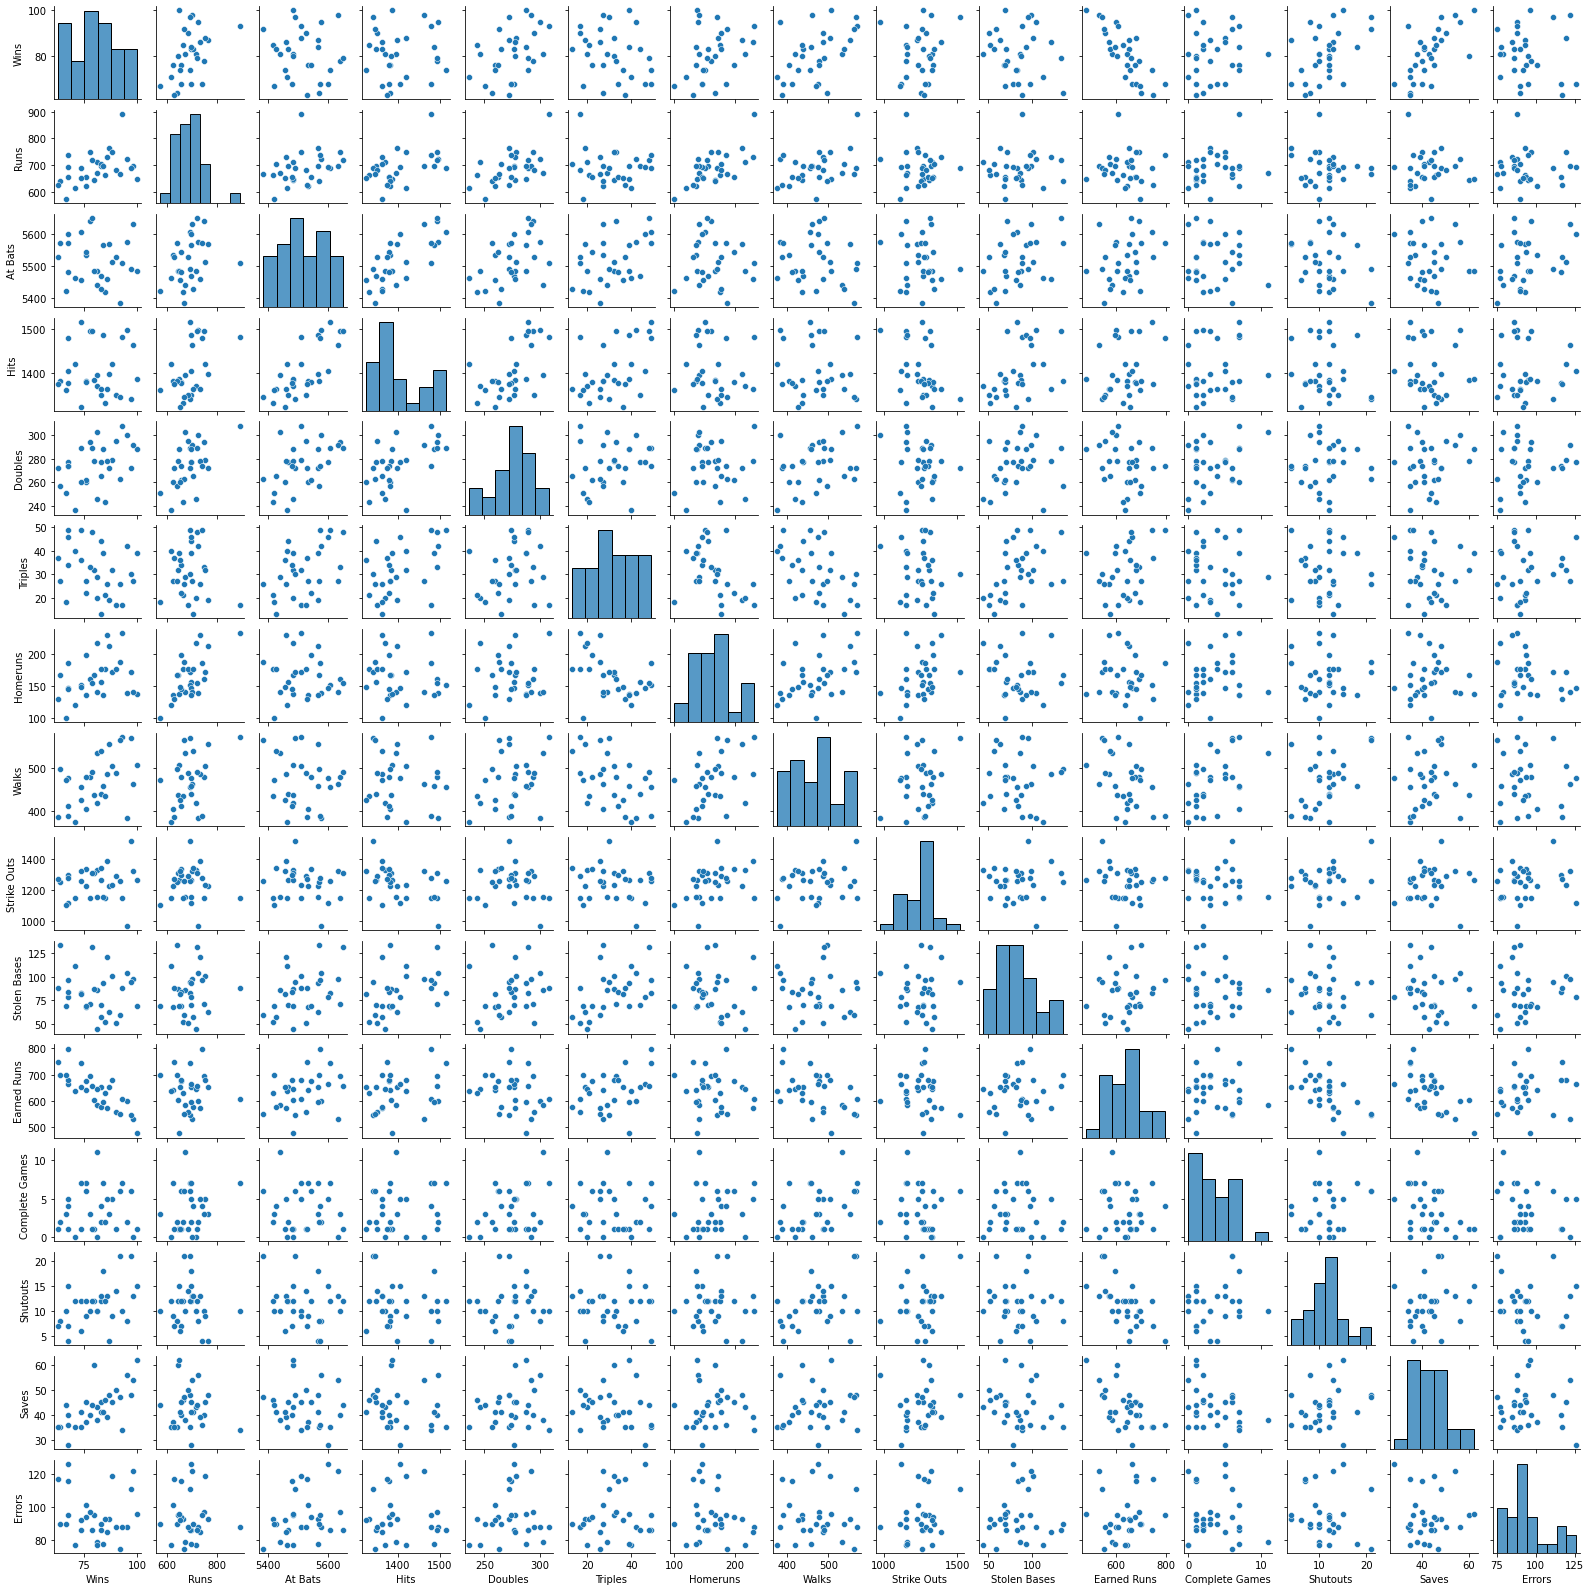

In [15]:
plt.figure(figsize=(4,4))
sns.pairplot(data,height=1.5)
plt.show()

The data is sacttered randomly

In [16]:
data_corr = data.corr()['Wins'][1:] 
high_corr = data_corr[abs(data_corr) > 0.4].sort_values(ascending=False)
print("There are {} strongly correlated values with Wins:\n{}".format(len(high_corr), high_corr))

There are 6 strongly correlated values with Wins:
Saves          0.666530
Walks          0.484342
Shutouts       0.471805
Runs           0.430751
Doubles        0.427797
Earned Runs   -0.809435
Name: Wins, dtype: float64


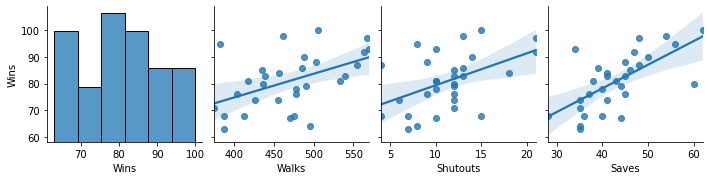

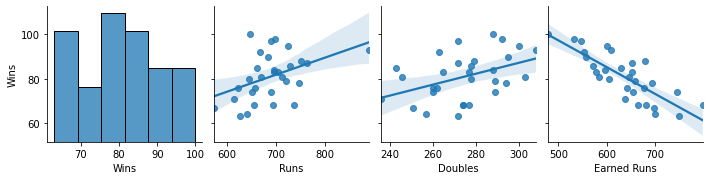

In [17]:
sns.pairplot(data, x_vars=['Wins','Walks','Shutouts','Saves'], y_vars=['Wins'], kind = 'reg')
sns.pairplot(data, x_vars=['Wins','Runs','Doubles','Earned Runs'], y_vars=['Wins'], kind = 'reg')

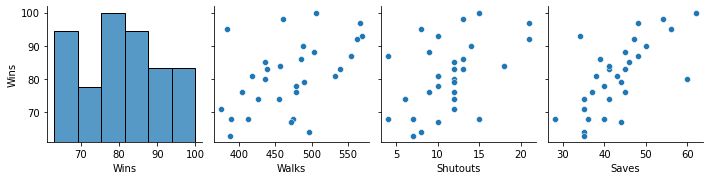

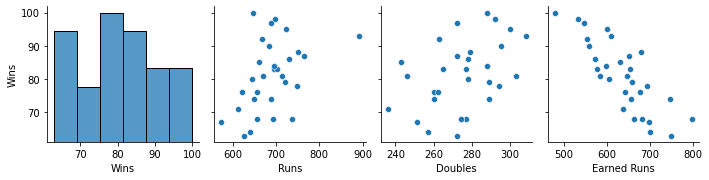

In [18]:
sns.pairplot(data, x_vars=['Wins','Walks','Shutouts','Saves'], y_vars=['Wins'], kind = 'scatter')
sns.pairplot(data, x_vars=['Wins','Runs','Doubles','Earned Runs'], y_vars=['Wins'], kind = 'scatter')

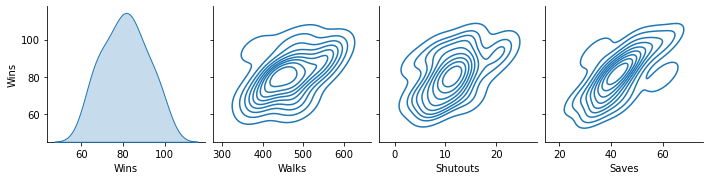

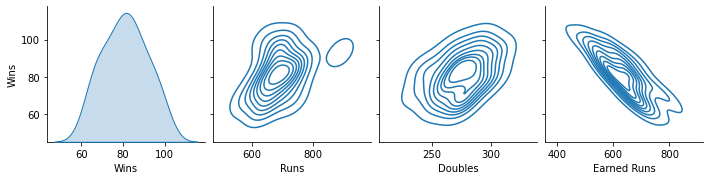

In [19]:
sns.pairplot(data, x_vars=['Wins','Walks','Shutouts','Saves'], y_vars=['Wins'], kind = 'kde')
sns.pairplot(data, x_vars=['Wins','Runs','Doubles','Earned Runs'], y_vars=['Wins'], kind = 'kde')

We can see a linear pattern with the help of the above graphs.

<AxesSubplot:>

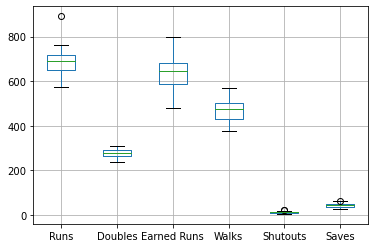

In [20]:
data.boxplot(column=['Runs','Doubles','Earned Runs','Walks','Shutouts','Saves'])

A new box plot so we can better view our variables. We have some outliers here but it is not necessary to remove them as we already have very less data and the outliers are not that many in number to affect our results significantly.

In [21]:
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report

Importing some useful libraires

### Performing test train split

In [22]:
X=data[['Runs','Doubles','Earned Runs','Walks','Shutouts','Saves']] #feature columns
y=data.Wins #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # I have chosen 20% of data as our test data

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape) 

X Train Shape  (24, 6)
Y Train Shape  (24,)
X Test Shape  (6, 6)
Y Test Shape  (6,)


### Decesion tree regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)


0.17547318611987384

### Random forest regression

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.6591190851735015

### Support vector regression

In [25]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.04484840023250114

### Lasso regression

In [26]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
y_pred_lasso = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)


0.8600816934906703

### Linear regression

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True).fit(X, y)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.9144163301046683

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.9144163301046682

Now we need additional information of our best model. i.e linear regressioon. we can also note that normalizing the data didn't make our model more/less accurate.

In [29]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lr), 2))

Mean absolute error = 3.16
Mean squared error = 12.06
Median absolute error = 3.28
Explain variance score = 0.92
R2 score = 0.91


In [30]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, X,y, cv=4)
print(scr.mean())

0.773580496039034


We have performed cross validation of our results, and the results are good.

## Hyper parameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameters = { 'normalize' : [True, False],
               'n_jobs' : [2,3,4],
               'fit_intercept' : [True, False]   
}

In [33]:
GCV = GridSearchCV(LinearRegression(),parameters,cv=5)

In [34]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [2, 3, 4],
                         'normalize': [True, False]})

In [35]:
GCV.best_params_

{'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [36]:
mod = LinearRegression(fit_intercept= True, n_jobs =2, normalize = False)
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.8617752509891303

## Saving the model

In [37]:
import joblib
joblib.dump(mod,"Baseball.pkl")

['Baseball.pkl']